In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from numpy import arange
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from numpy import arange
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import copy
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from numpy import argmax
from sklearn import metrics
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import roc_auc_score
import concurrent.futures

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import scipy.stats as ss
import itertools
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.manifold import TSNE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import scipy
import numpy as np, scipy.stats as st
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from numpy import interp
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.under_sampling import ClusterCentroids 
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from sklearn.linear_model import Perceptron

from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import OneSidedSelection 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SVMSMOTE
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
import itertools
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import matthews_corrcoef
import random
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import *
from collections import defaultdict
import xgboost

### Reading data and preparing for analysis

In [ ]:

import os
import pandas as pd

# -------------------------------------------------------------------
# 1. Base folder with all files
# -------------------------------------------------------------------
dest = "./data/"    #<- adjust this path as needed

# -------------------------------------------------------------------
# 2. Load train data and ranked features from dest
# -------------------------------------------------------------------
X_train = pd.read_csv(
    os.path.join(dest, "train_features_new_only_tnbc.txt"),
    sep="\t", index_col=0
)
y_train = pd.read_csv(
    os.path.join(dest, "train_labels_tnbc.txt"),
    sep="\t", header=0
).squeeze()

df_final_ranked = pd.read_table(
    os.path.join(dest, "final_ranked_features_top_30_genes_tnbc_samples_only_latest_rskf_scaled.txt")
)
final_ranked_features = df_final_ranked["Gene"].to_list()

# -------------------------------------------------------------------
# 3. Map labels so that pCR = 1, RD = 0 for train and GPL96 test sets
# -------------------------------------------------------------------
label_map = {"pCR": 1, "RD": 0}

y_train_int = y_train.map(label_map)

X_test_20271 = pd.read_csv(
    os.path.join(dest, "test_features_new_only_tnbc_GSE20271.txt"),
    sep="\t", index_col=0
)
y_test_20271 = pd.read_csv(
    os.path.join(dest, "test_labels_tnbc_20271.txt"),
    sep="\t", header=0
).squeeze()
y_test_20271 = y_test_20271.map(label_map)

X_test_20194 = pd.read_csv(
    os.path.join(dest, "test_features_new_only_tnbc_GSE20194.txt"),
    sep="\t", index_col=0
)
y_test_20194 = pd.read_csv(
    os.path.join(dest, "test_labels_tnbc_20194.txt"),
    sep="\t", header=0
).squeeze()
y_test_20194 = y_test_20194.map(label_map)

# -------------------------------------------------------------------
# 4. Subset train + GSE20271 + GSE20194 by consensus gene list
# -------------------------------------------------------------------
with open(os.path.join(dest, "consensus_genes_all_three_single_cell_datasets.txt"), "r") as f:
    consensus_genes = [line.strip() for line in f if line.strip()]

common_genes = list(
    set(consensus_genes)
    .intersection(set(X_train.columns))
    .intersection(set(X_test_20271.columns))
)

X_train_subset = X_train[common_genes]
X_test_20271_subset = X_test_20271[common_genes]
X_test_20194_subset = X_test_20194[common_genes]

# -------------------------------------------------------------------
# 5. Load all external test datasets from dest and apply label mappings
#    For these, 0/1 labels are flipped: {0:1, 1:0} as in your code
# -------------------------------------------------------------------

# GSE106977
X_test_106977 = pd.read_table(
    os.path.join(dest, "GSE106977_cleaned_use_this.txt"),
    index_col=0
)
y_test_106977 = X_test_106977["Labels"]
X_test_106977 = X_test_106977.drop(columns=["Labels"])
y_test_106977 = y_test_106977.map({0: 1, 1: 0})
print("GSE106977: \n", y_test_106977.value_counts())

# GSE103091
X_test_103091 = pd.read_table(
    os.path.join(dest, "GSE103091_processed_log2_using_death_0or1_label.txt"),
    index_col=0
)
y_test_103091 = X_test_103091["Labels"]
X_test_103091 = X_test_103091.drop(columns=["Labels"])
y_test_103091 = y_test_103091.map({0: 1, 1: 0})
print("GSE103091: \n", y_test_103091.value_counts())

# GSE21974
X_test_21974 = pd.read_table(
    os.path.join(dest, "GSE21974_processed_before_treatment_log2_using_response_label.txt"),
    index_col=0
)
y_test_21974 = X_test_21974["Labels"]
X_test_21974 = X_test_21974.drop(columns=["Labels"])
y_test_21974 = y_test_21974.map({0: 1, 1: 0})
print("GSE21974: \n", y_test_21974.value_counts())

# GSE21653
X_test_21653 = pd.read_table(
    os.path.join(dest, "GSE21653_processed_log2_using_dfs_0or1_label.txt"),
    index_col=0
)
y_test_21653 = X_test_21653["Labels"]
X_test_21653 = X_test_21653.drop(columns=["Labels"])
y_test_21653 = y_test_21653.map({0: 1, 1: 0})
print("GSE21653: \n", y_test_21653.value_counts())

# GSE32646
X_test_32646 = pd.read_table(
    os.path.join(dest, "GSE32646_processed_log2.txt"),
    index_col=0
)
y_test_32646 = X_test_32646["Labels"]
X_test_32646 = X_test_32646.drop(columns=["Labels"])
y_test_32646 = y_test_32646.map({0: 1, 1: 0})
print("GSE32646: \n", y_test_32646.value_counts())

# GSE50948
X_test_50948 = pd.read_table(
    os.path.join(dest, "GSE50948_processed_log2.txt"),
    index_col=0
)
y_test_50948 = X_test_50948["Labels"]
X_test_50948 = X_test_50948.drop(columns=["Labels"])
y_test_50948 = y_test_50948.map({0: 1, 1: 0})
print("GSE50948: \n", y_test_50948.value_counts())

# GSE31519 (pCR/RD -> 1/0 mapping)
X_test_31519 = pd.read_table(
    os.path.join(dest, "GSE31519_processed_log2.txt"),
    index_col=0
)
y_test_31519 = X_test_31519["Labels"]
X_test_31519 = X_test_31519.drop(columns=["Labels"])
y_test_31519 = y_test_31519.map(label_map)
print("GSE31519: \n", y_test_31519.value_counts())

# GSE140494 (pCR/RD -> 1/0 mapping)
X_test_140494 = pd.read_table(
    os.path.join(dest, "GSE140494_processed_log2.txt"),
    index_col=0
)
y_test_140494 = X_test_140494["Labels"]
X_test_140494 = X_test_140494.drop(columns=["Labels"])
y_test_140494 = y_test_140494.map(label_map)
print("GSE140494: \n", y_test_140494.value_counts())

# GSE41998 (AC response, 0/1 flipped)
X_test_41998 = pd.read_table(
    os.path.join(dest, "GSE41998_processed_log2_using_ac_response_label.txt"),
    index_col=0
)
y_test_41998 = X_test_41998["Labels"]
X_test_41998 = X_test_41998.drop(columns=["Labels"])
y_test_41998 = y_test_41998.map({0: 1, 1: 0})
print("GSE41998: \n", y_test_41998.value_counts())

print("\nAll variables loaded and label mappings applied.")



GSE106977: 
 Labels
0    73
1    46
Name: count, dtype: int64
GSE103091: 
 Labels
1    78
0    29
Name: count, dtype: int64
GSE21974: 
 Labels
1    22
0    10
Name: count, dtype: int64
GSE21653: 
 Labels
1    58
0    27
Name: count, dtype: int64
GSE32646: 
 Labels
0    16
1    10
Name: count, dtype: int64
GSE50948: 
 Labels
0    11
1     5
Name: count, dtype: int64
GSE31519: 
 Labels
1    12
0     6
Name: count, dtype: int64
GSE140494: 
 Labels
0    11
1    11
Name: count, dtype: int64
GSE41998: 
 Labels
0    98
1    24
Name: count, dtype: int64

All variables loaded and label mappings applied.


In [ ]:



# 1) Define signatures
sig_30 = final_ranked_features[:30]

four_gene_sig = [
   "HLF", "CXCL13", "SULT1E1", "GBP1"
]
tnbcdx_genes = [
    "CD79A", "CXCR6", "IRF4", "LAX1",
    "PDCD1", "PIM2", "POU2AF1", "SLAMF1", "TNFRSF17",
    "EXO1", "ASPM", "NEK2", "KIF23"
]
determaio = [
    "APOD","ASPN", "CCL5","CD52", "COL2A1", "CXCL11", "CXCL13", "DUSP5","FOXC1",
    "GZMB", "HTRA1","IDO1", "IL23A", "ITM2A","KMO",  "KRT16","KYNU",
    "MIA", "PSMB9", "PTGDS", "RTP4", "S100A8", "SFRP1", "SPTLC2",  "TNFAIP8","TNFSF10"
]
ba100 = [ "DEPDC1", "HAT1", "H2AFZ", "ODC1", "RFWD3", "DROSHA", "EHD1", "CENPX", "VRK1",
    "LAMC2", "PLEK2", "WHSC1", "RRM2", "SRCAP", "PSMB2", "NOP10",
    "ACTB", "H2AFV", "EHF", "ELN", "CSN3", "HLA-DPA1", "IGF2BP2", "NPY1R", "MSLN",
    "BCAR3", "PTPN20B", "TDRD12", "S100P", "PTH2R", "LYPLA1"]

signatures = {
    "SIG30": sig_30,
    "FOUR_GENE": four_gene_sig,
    "DETERMAIO": determaio,
    "BA100": ba100
}


# #the following is only for BA100 gene set mapping. uncomment this only for BA100
# # Define the mapping
# rename_map = {
#     "H2AFZ":  "H2AZ1",
#     "WHSC1":  "NSD2",
#     "H2AFV":  "H2AZ2",
#     "PTPN20B": "PTPN20",
#     "STRA13": "CENPX"
# }

# # Apply renaming to GSE106977
# X_test_106977.rename(columns=rename_map, inplace=True)

# # Apply renaming to GSE21974
# X_test_21974.rename(columns=rename_map, inplace=True)

external_sets = {
    "GSE140494": (X_test_140494, y_test_140494),
    "GSE20271" : (X_test_20271,  y_test_20271),
    "GSE20194" : (X_test_20194,  y_test_20194),
    "GSE106977" : (X_test_106977,  y_test_106977),
    "GSE103091": (X_test_103091,  y_test_103091),
    "GSE21974": (X_test_21974,  y_test_21974),
    "GSE21653": (X_test_21653,  y_test_21653),
    "GSE32646": (X_test_32646,  y_test_32646),
    "GSE50948": (X_test_50948,  y_test_50948),
    "GSE31519": (X_test_31519,  y_test_31519),
    "GSE41998": (X_test_41998,  y_test_41998)
}


def check_overlap(name, X):
    present = [g for g in determaio if g in X.columns]
    missing = [g for g in determaio if g not in X.columns]
    return {
        "Dataset": name,
        "n_present": len(present),
        "n_missing": len(missing),
        "percent_present": round(100 * len(present) / len(determaio), 2),
        "present_genes": present,
        "missing_genes": missing
    }

overlap_results = []

# 1) Check training set
overlap_results.append(check_overlap("TRAIN", X_train))


# 2) Check all 11 external datasets
for ds_name, (Xte, yte) in external_sets.items():
    overlap_results.append(check_overlap(ds_name, Xte))

import pandas as pd
overlap_df = pd.DataFrame(overlap_results)
overlap_df


,Dataset,n_present,n_missing,percent_present,present_genes,missing_genes
0,TRAIN,26,0,100.0,"[APOD, ASPN, CCL5, CD52, COL2A1, CXCL11, CXCL1...",[]
1,GSE140494,26,0,100.0,"[APOD, ASPN, CCL5, CD52, COL2A1, CXCL11, CXCL1...",[]
2,GSE20271,26,0,100.0,"[APOD, ASPN, CCL5, CD52, COL2A1, CXCL11, CXCL1...",[]
3,GSE20194,26,0,100.0,"[APOD, ASPN, CCL5, CD52, COL2A1, CXCL11, CXCL1...",[]
4,GSE106977,26,0,100.0,"[APOD, ASPN, CCL5, CD52, COL2A1, CXCL11, CXCL1...",[]
5,GSE103091,26,0,100.0,"[APOD, ASPN, CCL5, CD52, COL2A1, CXCL11, CXCL1...",[]
6,GSE21974,26,0,100.0,"[APOD, ASPN, CCL5, CD52, COL2A1, CXCL11, CXCL1...",[]
7,GSE21653,26,0,100.0,"[APOD, ASPN, CCL5, CD52, COL2A1, CXCL11, CXCL1...",[]
8,GSE32646,26,0,100.0,"[APOD, ASPN, CCL5, CD52, COL2A1, CXCL11, CXCL1...",[]
9,GSE50948,26,0,100.0,"[APOD, ASPN, CCL5, CD52, COL2A1, CXCL11, CXCL1...",[]


In [ ]:
# Check label values across all external test sets
for ds_name, (Xte, yte) in external_sets.items():
    print(f"\nDataset: {ds_name}")
    print("Unique labels:", pd.Series(yte).unique())


### Running best sampling-classifier combinations on all external validation sets

In [ ]:
model_funcs = {
    "SVM": SVM,
    "DT": DT,
    "KNN": KNN,
    "RF": RF,
    #"XGB: XGB,
    "ET": ET,
    "BRF": BRF,
    "EE": EE,
}

# ----------------------------------------------------
# 2. Define sampling methods (keys used in apply_resampling)
# ----------------------------------------------------
sampling_methods = [
    "smote",
    "adasyn",
    "svmsmote",
    "ccn",
    "enn",
    "renn",
    "iht",
    "rus",
]

results_all = run_external_validation_for_signature(
    external_sets = {
        ds: external_sets[ds]
        for ds in external_sets
        if ds not in [""]
    },
    top_features       = signatures['DETERMAIO'],   # or your preferred set change this to BA100, TNBCDX-14 etc 
    X_train            = X_train,
    y_train_int        = y_train_int,
    model_funcs        = model_funcs,
    sampling_methods   = sampling_methods,
    #outdir             = "/data1/TNBC-DX-external-validation/DetermaIO/", <- adjust this path as needed
    prefix             = "DETERMAIO"
)



#### Running permutation tests for all external validation datasets

In [ ]:
#This takes a while to run. please adjust n_jobs as per your system capability.
perm_results = run_permutation_all(
    all_results=all_results,
    clf_configs=clf_configs,
    B=100,
    random_state=42
)


### Plotting the combined ROC curve

      Dataset       AUC    n  n_pos  n_neg
1    GSE20194  0.954783   71     25     46
7    GSE50948  0.854545   16      5     11
8    GSE21974  0.809091   32     22     10
0    GSE20271  0.806856   59     13     46
2    GSE31519  0.791667   18     12      6
3   GSE140494  0.776860   22     11     11
4    GSE21653  0.734355   85     58     27
10  GSE106977  0.697737  119     46     73
6    GSE32646  0.690625   26     10     16
5   GSE103091  0.672414  107     78     29
9    GSE41998  0.670281  122     24     98


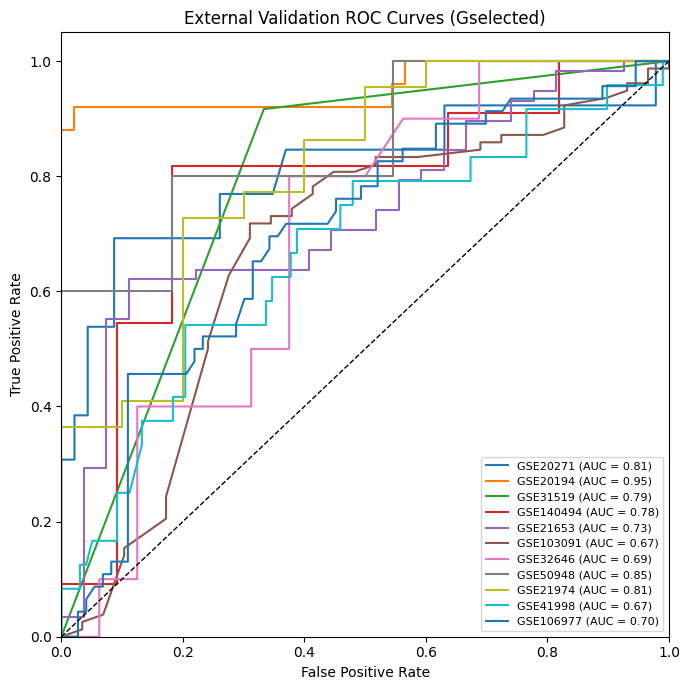

In [ ]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

dest = "./data/"         # <-- adjust this path as needed


base_dir = os.path.join(dest,"pickled_models")

# Map short dataset labels to the suffix used in filenames
datasets = {
    "GSE20271": "20271",               # separate
    "GSE20194": "20194",
    "GSE31519": "31519",
    "GSE140494": "140494",
    "GSE21653": "21653",
    "GSE103091": "103091",
    "GSE32646": "32646",
    "GSE50948": "50948",
    "GSE21974": "21974",  
    "GSE41998": "41998",
    "GSE106977": "106977",
    
    
}

roc_results = []

plt.figure(figsize=(7, 7))

for label, suf in datasets.items():
    y_test_path  = os.path.join(base_dir, f"y_test_{suf}.pkl")
    y_probs_path = os.path.join(base_dir, f"y_probs_{suf}.pkl")

    if not (os.path.exists(y_test_path) and os.path.exists(y_probs_path)):
        print(f"[WARN] Missing files for {label}: {y_test_path} or {y_probs_path}")
        continue

    with open(y_test_path, "rb") as f:
        y_test = pickle.load(f)
    with open(y_probs_path, "rb") as f:
        y_probs = pickle.load(f)

    y_test  = np.asarray(y_test)
    y_probs = np.asarray(y_probs)

    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)

    roc_results.append({
        "Dataset": label,
        "AUC": auc,
        "n": len(y_test),
        "n_pos": int((y_test == 1).sum()),
        "n_neg": int((y_test == 0).sum())
    })

    plt.plot(fpr, tpr, lw=1.5, label=f"{label} (AUC = {auc:.2f})")

# Diagonal + cosmetics
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("External Validation ROC Curves (Gselected)")
plt.legend(fontsize=8, loc="lower right")
plt.tight_layout()
# Summary table
roc_df = pd.DataFrame(roc_results).sort_values("AUC", ascending=False)
print(roc_df)

# Save and show
plt.show()


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import pandas as pd

def run_external_generic(
    X_train_subset,
    y_train_int,
    X_test,
    y_test,
    final_ranked_features,
    clf_func,
    clf_name="XGB",
    dataset_name="external",
    method="rus",
    top_n=30
):
    """
    Generic external validation runner.

    Parameters
    ----------
    X_train_subset : pd.DataFrame
        Training feature matrix (full set of features).
    y_train_int : array-like
        Integer-encoded training labels.
    X_test : pd.DataFrame
        Test feature matrix (same columns as X_train_subset).
    y_test : array-like
        Integer-encoded test labels.
    final_ranked_features : list
        Ranked feature list (best first).
    clf_func : callable
        Classifier function, e.g. XGB, RF, SVM, etc.
        Must accept (X_train_scaled, y_resampled, X_test_scaled, y_test)
        and return the same outputs as your XGB function.
    clf_name : str
        Name of the classifier (for printing).
    dataset_name : str
        Name of the external dataset (for printing).
    method : str
        Resampling method for apply_resampling().
    top_n : int
        Number of top-ranked features to use.

    Returns
    -------
    results : dict
        Contains scaled data, model, predictions, and metrics.
    """

    # 1. Select top-N features
    top_features = final_ranked_features[:top_n]
    X_train_final = X_train_subset[top_features]
    X_test_final  = X_test[top_features]

    # 2. Resample training data
    X_resampled, y_resampled = apply_resampling(
        X_train_final, y_train_int, method=method
    )

    # 3. Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_resampled)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_final.columns)

    X_test_scaled = scaler.transform(X_test_final)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_final.columns)

    # 4. Train + evaluate with chosen classifier
    (sen, spe, auc, features_used, acc, mcc,
     fpr, tpr, thresholds, y_pred, y_probs,
     model, train_auc, train_sen, train_spe,
     train_acc, train_mcc) = clf_func(
        X_train_scaled, y_resampled, X_test_scaled, y_test
    )

    # 5. F1 on test
    f1 = f1_score(y_test, y_pred)

    # 6. Pretty print
    header = f"=== {dataset_name} | {clf_name} | method={method} | top_n={top_n} ==="
    print(header)
    print(f"[Test ] Sensitivity: {sen:.3f} | Specificity: {spe:.3f} | "
          f"AUC: {auc:.3f} | Accuracy: {acc:.3f} | MCC: {mcc:.3f} | F1: {f1:.3f}")
    print(f"[Train] Sensitivity: {train_sen:.3f} | Specificity: {train_spe:.3f} | "
          f"AUC: {train_auc:.3f} | Accuracy: {train_acc:.3f} | MCC: {train_mcc:.3f}")
    print()

    return {
        "X_train_scaled": X_train_scaled,
        "y_train_resampled": y_resampled,
        "X_test_scaled": X_test_scaled,
        "y_test": y_test,
        "model": model,
        "features_used": features_used,
        "fpr": fpr,
        "tpr": tpr,
        "thresholds": thresholds,
        "y_pred": y_pred,
        "y_probs": y_probs,
        "metrics": {
            "test_sen": sen,
            "test_spe": spe,
            "test_auc": auc,
            "test_acc": acc,
            "test_mcc": mcc,
            "test_f1": f1,
            "train_sen": train_sen,
            "train_spe": train_spe,
            "train_auc": train_auc,
            "train_acc": train_acc,
            "train_mcc": train_mcc,
        }
    }


In [4]:
def run_all_external(
    external_sets,
    clf_configs,
    X_train_subset,
    y_train_int,
    final_ranked_features,
    default_top_n=30
):
    """
    external_sets : dict
        {"GSE140494": (X_test_140494, y_test_140494), ...}

    clf_configs : dict
        {
          "GSE140494": {"clf_func": XGB, "clf_name": "XGB", "method": "rus",  "top_n": 30},
          "GSE20271" : {"clf_func": RF,  "clf_name": "RF",  "method": "renn", "top_n": 25},
          ...
        }
    """
    all_results = {}

    for ds_name, (X_ext, y_ext) in external_sets.items():
        if ds_name not in clf_configs:
            # skip datasets without a config
            continue

        cfg       = clf_configs[ds_name]
        clf_func  = cfg["clf_func"]
        clf_name  = cfg.get("clf_name", clf_func.__name__)
        method    = cfg.get("method", "rus")
        top_n     = cfg.get("top_n", default_top_n)

        key = f"{clf_name}_method-{method}_top{top_n}"

        res = run_external_generic(
            X_train_subset=X_train_subset,
            y_train_int=y_train_int,
            X_test=X_ext,
            y_test=y_ext,
            final_ranked_features=final_ranked_features,
            clf_func=clf_func,
            clf_name=clf_name,
            dataset_name=ds_name,
            method=method,
            top_n=top_n
        )

        if ds_name not in all_results:
            all_results[ds_name] = {}
        all_results[ds_name][key] = res

    return all_results


In [5]:
import numpy as np
from sklearn.utils import shuffle

def permutation_test_from_scaled(
    model_fn,
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test,
    B=100,
    random_state=42
):
    """
    Permutation test using pre-scaled, pre-resampled data.

    Parameters
    ----------
    model_fn : callable
        Classifier function (e.g. XGB, RF, SVM) with signature:
        model_fn(X_train_scaled, y_train, X_test_scaled, y_test)
        and returning (..., auc, ...).
    X_train_scaled : pd.DataFrame
    y_train : array-like
    X_test_scaled : pd.DataFrame
    y_test : array-like
    B : int
        Number of permutations.
    random_state : int

    Returns
    -------
    dict with:
        real_metric, perm_distribution, p_value,
        mean_perm, sd_perm, ci_lower, ci_upper, z_score, count_extreme
    """

    rng = np.random.default_rng(random_state)

    # -------- 1) REAL MODEL --------
    (sen, spe, auc_real,
     features_used, acc, mcc,
     fpr, tpr, thresholds,
     y_pred_real, y_prob_real,
     model_real,
     train_auc, train_sen, train_spe, train_acc, train_mcc) = model_fn(
        X_train_scaled, y_train,
        X_test_scaled,  y_test
    )

    real_metric = auc_real  # if you want MCC or ACC, change here

    # -------- 2) PERMUTATION LOOP --------
    perm_metrics = []

    for b in range(B):
        # permute training labels only
        y_perm = shuffle(y_train, random_state=rng.integers(1e9))

        (sen_b, spe_b, auc_b,
         _, _, _,
         _, _, _,
         _, y_prob_b,
         _,
         _, _, _, _, _) = model_fn(
            X_train_scaled, y_perm,
            X_test_scaled,  y_test
        )

        perm_metrics.append(auc_b)

        if (b + 1) % 50 == 0:
            print(f"Permutation {b+1}/{B} completed")

    perm_metrics = np.array(perm_metrics)

    # -------- 3) SUMMARY STATS --------
    pval = (1 + np.sum(perm_metrics >= real_metric)) / (1 + B)

    mean_perm = perm_metrics.mean()
    sd_perm   = perm_metrics.std(ddof=1)
    ci_lower  = np.quantile(perm_metrics, 0.025)
    ci_upper  = np.quantile(perm_metrics, 0.975)

    z_score = (real_metric - mean_perm) / sd_perm
    count_extreme = np.sum(perm_metrics >= real_metric)

    return {
        "real_metric": real_metric,
        "perm_distribution": perm_metrics,
        "p_value": pval,
        "mean_perm": mean_perm,
        "sd_perm": sd_perm,
        "ci_lower": ci_lower,
        "ci_upper": ci_upper,
        "z_score": z_score,
        "count_extreme": count_extreme,
    }


In [6]:
def run_permutation_all(
    all_results,
    clf_configs,
    B=100,
    random_state=42
):
    """
    Run permutation tests for each dataset using its chosen
    classifier/method/top_n combination as defined in clf_configs.

    Returns
    -------
    perm_results : dict
        perm_results[dataset_name] = {
            "real_metric", "p_value", "mean_perm", "sd_perm",
            "ci_lower", "ci_upper", "z_score", "count_extreme"
        }
    """

    perm_results = {}

    for ds_name, cfg in clf_configs.items():
        clf_func  = cfg["clf_func"]
        clf_name  = cfg.get("clf_name", clf_func.__name__)
        method    = cfg.get("method", "rus")
        top_n     = cfg.get("top_n", 30)

        key = f"{clf_name}_method-{method}_top{top_n}"

        if ds_name not in all_results or key not in all_results[ds_name]:
            print(f"[WARN] No results found for {ds_name} with key {key}, skipping.")
            continue

        res = all_results[ds_name][key]

        X_train_scaled = res["X_train_scaled"]
        y_train_res    = res["y_train_resampled"]
        X_test_scaled  = res["X_test_scaled"]
        y_test         = res["y_test"]

        print(f"\n=== Permutation test: {ds_name} | {clf_name} | method={method} | top_n={top_n} ===")

        perm_out = permutation_test_from_scaled(
            model_fn=clf_func,
            X_train_scaled=X_train_scaled,
            y_train=y_train_res,
            X_test_scaled=X_test_scaled,
            y_test=y_test,
            B=B,
            random_state=random_state
        )

        # pretty print
        print(f"Real AUC: {perm_out['real_metric']:.3f}")
        print(f"Permutation p-value: {perm_out['p_value']:.4f}")
        print(f"Null mean AUC: {perm_out['mean_perm']:.3f}")
        print(f"Null SD AUC: {perm_out['sd_perm']:.3f}")
        print(f"Null 95% CI: [{perm_out['ci_lower']:.3f}, {perm_out['ci_upper']:.3f}]")
        print(f"Z-score: {perm_out['z_score']:.3f}")
        print(f"Permutations >= observed: {perm_out['count_extreme']} / {B}")

        perm_results[ds_name] = perm_out

    return perm_results


In [7]:
def apply_resampling(X, y, method='smote'):
    samplers = {
        'smote': SMOTE(random_state=42),
        'adasyn': ADASYN(random_state=42),
        'svmsmote': SVMSMOTE(random_state=42),  
        'ccn': ClusterCentroids(random_state=42),
        'enn': EditedNearestNeighbours(),
        'renn': RepeatedEditedNearestNeighbours(),
        'iht': InstanceHardnessThreshold(random_state=42),
        'rus': RandomUnderSampler(random_state=42)
    }
    if method not in samplers:
        raise ValueError(f"Unsupported resampling method: {method}")
    
    X_res, y_res = samplers[method].fit_resample(X, y)
    return pd.DataFrame(X_res, columns=X.columns), y_res


In [8]:
import numpy as np
from numpy import arange, argmax

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    roc_auc_score, accuracy_score, matthews_corrcoef, roc_curve, f1_score
)

# You already have these somewhere:
# from your_metrics_module import sensitivity_score, specificity_score


# ---------------- HELPER ---------------- #
def convert_to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype(int)


# ---------------- BALANCED RANDOM FOREST ---------------- #
def BRF(X_train, y_train, X_test, y_test):

    rf = BalancedRandomForestClassifier(random_state=42, class_weight="balanced")

    grid_params = {
        'n_estimators': [10, 20, 30, 50, 100, 200, 500],
        'max_depth': [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': [1, 3, 5],
        'min_samples_split': [2, 5, 10, 12],
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf_rf = GridSearchCV(rf, grid_params, cv=cv, scoring="roc_auc", n_jobs=-1)
    clf_rf.fit(X_train, y_train)
    best_model = clf_rf.best_estimator_

    # TEST predictions
    y_probs = best_model.predict_proba(X_test[X_train.columns])[:, 1]
    thresholds_grid = arange(0, 1, 0.001)
    scores = [roc_auc_score(y_test, convert_to_labels(y_probs, t))
              for t in thresholds_grid]
    ix = argmax(scores)
    y_test_predictions = convert_to_labels(y_probs, thresholds_grid[ix])

    fp_rate, tp_rate, thresholds_roc = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    sen = sensitivity_score(y_test, y_test_predictions, pos_label=1)
    spe = specificity_score(y_test, y_test_predictions, pos_label=1)
    acc = accuracy_score(y_test, y_test_predictions)
    mcc = matthews_corrcoef(y_test, y_test_predictions)

    # TRAIN predictions/metrics (probability-based)
    train_probs = best_model.predict_proba(X_train)[:, 1]
    train_pred = convert_to_labels(train_probs, 0.5)

    train_auc = roc_auc_score(y_train, train_probs)
    train_sen = sensitivity_score(y_train, train_pred, pos_label=1)
    train_spe = specificity_score(y_train, train_pred, pos_label=1)
    train_acc = accuracy_score(y_train, train_pred)
    train_mcc = matthews_corrcoef(y_train, train_pred)

    return (sen, spe, auc_score,
            X_train.columns, acc, mcc,
            fp_rate, tp_rate, thresholds_roc,
            y_test_predictions, y_probs, best_model,
            train_auc, train_sen, train_spe, train_acc, train_mcc)


# ---------------- DECISION TREE ---------------- #
def DT(X_train, y_train, X_test, y_test):

    dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")
    grid_params = {
        'max_depth': [2, 4, 6, 8, 10, 12],
        'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
        'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
        'max_features': [None, 'sqrt', 'log2'],
        'criterion': ["gini", "entropy"]
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf_rf = GridSearchCV(dt, grid_params, cv=cv, scoring="roc_auc", n_jobs=-1)
    clf_rf.fit(X_train, y_train)
    best_model = clf_rf.best_estimator_

    y_probs = best_model.predict_proba(X_test[X_train.columns])[:, 1]
    thresholds_grid = arange(0, 1, 0.001)
    scores = [roc_auc_score(y_test, convert_to_labels(y_probs, t))
              for t in thresholds_grid]
    ix = argmax(scores)
    y_test_predictions = convert_to_labels(y_probs, thresholds_grid[ix])

    fp_rate, tp_rate, thresholds_roc = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    sen = sensitivity_score(y_test, y_test_predictions, pos_label=1)
    spe = specificity_score(y_test, y_test_predictions, pos_label=1)
    acc = accuracy_score(y_test, y_test_predictions)
    mcc = matthews_corrcoef(y_test, y_test_predictions)

    train_probs = best_model.predict_proba(X_train)[:, 1]
    train_pred = convert_to_labels(train_probs, 0.5)

    train_auc = roc_auc_score(y_train, train_probs)
    train_sen = sensitivity_score(y_train, train_pred, pos_label=1)
    train_spe = specificity_score(y_train, train_pred, pos_label=1)
    train_acc = accuracy_score(y_train, train_pred)
    train_mcc = matthews_corrcoef(y_train, train_pred)

    return (sen, spe, auc_score,
            X_train.columns, acc, mcc,
            fp_rate, tp_rate, thresholds_roc,
            y_test_predictions, y_probs, best_model,
            train_auc, train_sen, train_spe, train_acc, train_mcc)


# ---------------- LOGISTIC REGRESSION ---------------- #
def LOGIT(X_train, y_train, X_test, y_test):

    logreg = LogisticRegression(class_weight="balanced", random_state=42, solver="liblinear")
    grid_params = {
        "C": np.logspace(-3, 3, 7),
        "penalty": ["l1", "l2"]
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf_rf = GridSearchCV(logreg, grid_params, cv=cv, scoring="roc_auc", n_jobs=-1)
    clf_rf.fit(X_train, y_train)
    best_model = clf_rf.best_estimator_

    y_probs = best_model.predict_proba(X_test[X_train.columns])[:, 1]
    thresholds_grid = arange(0, 1, 0.001)
    scores = [roc_auc_score(y_test, convert_to_labels(y_probs, t))
              for t in thresholds_grid]
    ix = argmax(scores)
    y_test_predictions = convert_to_labels(y_probs, thresholds_grid[ix])

    fp_rate, tp_rate, thresholds_roc = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    sen = sensitivity_score(y_test, y_test_predictions, pos_label=1)
    spe = specificity_score(y_test, y_test_predictions, pos_label=1)
    acc = accuracy_score(y_test, y_test_predictions)
    mcc = matthews_corrcoef(y_test, y_test_predictions)

    train_probs = best_model.predict_proba(X_train)[:, 1]
    train_pred = convert_to_labels(train_probs, 0.5)

    train_auc = roc_auc_score(y_train, train_probs)
    train_sen = sensitivity_score(y_train, train_pred, pos_label=1)
    train_spe = specificity_score(y_train, train_pred, pos_label=1)
    train_acc = accuracy_score(y_train, train_pred)
    train_mcc = matthews_corrcoef(y_train, train_pred)

    return (sen, spe, auc_score,
            X_train.columns, acc, mcc,
            fp_rate, tp_rate, thresholds_roc,
            y_test_predictions, y_probs, best_model,
            train_auc, train_sen, train_spe, train_acc, train_mcc)


# ---------------- SVM ---------------- #
def SVM(X_train, y_train, X_test, y_test):

    svm = SVC(random_state=42, probability=True, class_weight="balanced")
    grid_params = [
        {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
        {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
         'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
    ]

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf_rf = GridSearchCV(svm, grid_params, cv=cv, scoring="roc_auc", n_jobs=-1)
    clf_rf.fit(X_train, y_train)
    best_model = clf_rf.best_estimator_

    y_probs = best_model.predict_proba(X_test[X_train.columns])[:, 1]
    thresholds_grid = arange(0, 1, 0.001)
    scores = [roc_auc_score(y_test, convert_to_labels(y_probs, t))
              for t in thresholds_grid]
    ix = argmax(scores)
    y_test_predictions = convert_to_labels(y_probs, thresholds_grid[ix])

    fp_rate, tp_rate, thresholds_roc = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    sen = sensitivity_score(y_test, y_test_predictions, pos_label=1)
    spe = specificity_score(y_test, y_test_predictions, pos_label=1)
    acc = accuracy_score(y_test, y_test_predictions)
    mcc = matthews_corrcoef(y_test, y_test_predictions)

    train_probs = best_model.predict_proba(X_train)[:, 1]
    train_pred = convert_to_labels(train_probs, 0.5)

    train_auc = roc_auc_score(y_train, train_probs)
    train_sen = sensitivity_score(y_train, train_pred, pos_label=1)
    train_spe = specificity_score(y_train, train_pred, pos_label=1)
    train_acc = accuracy_score(y_train, train_pred)
    train_mcc = matthews_corrcoef(y_train, train_pred)

    return (sen, spe, auc_score,
            X_train.columns, acc, mcc,
            fp_rate, tp_rate, thresholds_roc,
            y_test_predictions, y_probs, best_model,
            train_auc, train_sen, train_spe, train_acc, train_mcc)


# ---------------- KNN ---------------- #
def KNN(X_train, y_train, X_test, y_test):

    knn = KNeighborsClassifier()
    grid_params = {
        'n_neighbors': [5, 7, 9, 11, 13, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski', 'euclidean', 'manhattan']
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf_rf = GridSearchCV(knn, grid_params, cv=cv, scoring="roc_auc", n_jobs=-1)
    clf_rf.fit(X_train, y_train)
    best_model = clf_rf.best_estimator_

    y_probs = best_model.predict_proba(X_test[X_train.columns])[:, 1]
    thresholds_grid = arange(0, 1, 0.001)
    scores = [roc_auc_score(y_test, convert_to_labels(y_probs, t))
              for t in thresholds_grid]
    ix = argmax(scores)
    y_test_predictions = convert_to_labels(y_probs, thresholds_grid[ix])

    fp_rate, tp_rate, thresholds_roc = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    sen = sensitivity_score(y_test, y_test_predictions, pos_label=1)
    spe = specificity_score(y_test, y_test_predictions, pos_label=1)
    acc = accuracy_score(y_test, y_test_predictions)
    mcc = matthews_corrcoef(y_test, y_test_predictions)

    train_probs = best_model.predict_proba(X_train)[:, 1]
    train_pred = convert_to_labels(train_probs, 0.5)

    train_auc = roc_auc_score(y_train, train_probs)
    train_sen = sensitivity_score(y_train, train_pred, pos_label=1)
    train_spe = specificity_score(y_train, train_pred, pos_label=1)
    train_acc = accuracy_score(y_train, train_pred)
    train_mcc = matthews_corrcoef(y_train, train_pred)

    return (sen, spe, auc_score,
            X_train.columns, acc, mcc,
            fp_rate, tp_rate, thresholds_roc,
            y_test_predictions, y_probs, best_model,
            train_auc, train_sen, train_spe, train_acc, train_mcc)


# ---------------- EASY ENSEMBLE ---------------- #
def EE(X_train, y_train, X_test, y_test):

    ee = EasyEnsembleClassifier(random_state=42)
    grid_params = {
        'n_estimators': [10, 20, 30, 50, 100, 200, 500],
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf_rf = GridSearchCV(ee, grid_params, cv=cv, scoring="roc_auc", n_jobs=-1)
    clf_rf.fit(X_train, y_train)
    best_model = clf_rf.best_estimator_

    y_probs = best_model.predict_proba(X_test[X_train.columns])[:, 1]
    thresholds_grid = arange(0, 1, 0.001)
    scores = [roc_auc_score(y_test, convert_to_labels(y_probs, t))
              for t in thresholds_grid]
    ix = argmax(scores)
    y_test_predictions = convert_to_labels(y_probs, thresholds_grid[ix])

    fp_rate, tp_rate, thresholds_roc = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    sen = sensitivity_score(y_test, y_test_predictions, pos_label=1)
    spe = specificity_score(y_test, y_test_predictions, pos_label=1)
    acc = accuracy_score(y_test, y_test_predictions)
    mcc = matthews_corrcoef(y_test, y_test_predictions)

    train_probs = best_model.predict_proba(X_train)[:, 1]
    train_pred = convert_to_labels(train_probs, 0.5)

    train_auc = roc_auc_score(y_train, train_probs)
    train_sen = sensitivity_score(y_train, train_pred, pos_label=1)
    train_spe = specificity_score(y_train, train_pred, pos_label=1)
    train_acc = accuracy_score(y_train, train_pred)
    train_mcc = matthews_corrcoef(y_train, train_pred)

    return (sen, spe, auc_score,
            X_train.columns, acc, mcc,
            fp_rate, tp_rate, thresholds_roc,
            y_test_predictions, y_probs, best_model,
            train_auc, train_sen, train_spe, train_acc, train_mcc)


# ---------------- EXTRA TREES ---------------- #
def ET(X_train, y_train, X_test, y_test):

    rf = ExtraTreesClassifier(random_state=42, class_weight="balanced")
    grid_params = {
        'n_estimators': [5, 10, 20, 30, 50, 100, 200, 500],
        'max_depth': [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': [1, 3, 5],
        'min_samples_split': [2, 5, 10, 12],
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf_rf = GridSearchCV(rf, grid_params, cv=cv, scoring="roc_auc", n_jobs=-1)
    clf_rf.fit(X_train, y_train)
    best_model = clf_rf.best_estimator_

    y_probs = best_model.predict_proba(X_test[X_train.columns])[:, 1]
    thresholds_grid = arange(0, 1, 0.001)
    scores = [roc_auc_score(y_test, convert_to_labels(y_probs, t))
              for t in thresholds_grid]
    ix = argmax(scores)
    y_test_predictions = convert_to_labels(y_probs, thresholds_grid[ix])

    fp_rate, tp_rate, thresholds_roc = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    sen = sensitivity_score(y_test, y_test_predictions, pos_label=1)
    spe = specificity_score(y_test, y_test_predictions, pos_label=1)
    acc = accuracy_score(y_test, y_test_predictions)
    mcc = matthews_corrcoef(y_test, y_test_predictions)

    train_probs = best_model.predict_proba(X_train)[:, 1]
    train_pred = convert_to_labels(train_probs, 0.5)

    train_auc = roc_auc_score(y_train, train_probs)
    train_sen = sensitivity_score(y_train, train_pred, pos_label=1)
    train_spe = specificity_score(y_train, train_pred, pos_label=1)
    train_acc = accuracy_score(y_train, train_pred)
    train_mcc = matthews_corrcoef(y_train, train_pred)

    return (sen, spe, auc_score,
            X_train.columns, acc, mcc,
            fp_rate, tp_rate, thresholds_roc,
            y_test_predictions, y_probs, best_model,
            train_auc, train_sen, train_spe, train_acc, train_mcc)


# ---------------- RANDOM FOREST ---------------- #
def RF(X_train, y_train, X_test, y_test):

    rf = RandomForestClassifier(random_state=42, class_weight="balanced")
    grid_params = {
        'n_estimators': [10, 20, 30, 50, 100, 200, 500],
        'max_depth': [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': [1, 3, 5],
        'min_samples_split': [2, 5, 10, 12],
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf_rf = GridSearchCV(rf, grid_params, cv=cv, scoring='roc_auc', n_jobs=-1)
    clf_rf.fit(X_train, y_train)
    best_model = clf_rf.best_estimator_

    y_probs = best_model.predict_proba(X_test[X_train.columns])[:, 1]
    thresholds_grid = arange(0, 1, 0.001)
    scores = [roc_auc_score(y_test, convert_to_labels(y_probs, t))
              for t in thresholds_grid]
    ix = argmax(scores)
    y_test_pred = convert_to_labels(y_probs, thresholds_grid[ix])

    sen = sensitivity_score(y_test, y_test_pred, pos_label=1)
    spe = specificity_score(y_test, y_test_pred, pos_label=1)
    acc = accuracy_score(y_test, y_test_pred)
    mcc = matthews_corrcoef(y_test, y_test_pred)
    auc_score = roc_auc_score(y_test, y_probs)
    fp_rate, tp_rate, thresholds_roc = roc_curve(y_test, y_probs)

    train_probs = best_model.predict_proba(X_train)[:, 1]
    train_pred = convert_to_labels(train_probs, 0.5)

    train_auc = roc_auc_score(y_train, train_probs)
    train_sen = sensitivity_score(y_train, train_pred, pos_label=1)
    train_spe = specificity_score(y_train, train_pred, pos_label=1)
    train_acc = accuracy_score(y_train, train_pred)
    train_mcc = matthews_corrcoef(y_train, train_pred)

    return (sen, spe, auc_score,
            X_train.columns, acc, mcc,
            fp_rate, tp_rate, thresholds_roc,
            y_test_pred, y_probs, best_model,
            train_auc, train_sen, train_spe, train_acc, train_mcc)


# ---------------- XGBOOST ---------------- #
from xgboost import XGBClassifier

def XGB(X_train, y_train, X_test, y_test):

    xgb = XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        random_state=42,
        scale_pos_weight=1
    )

    grid_params = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf_xgb = GridSearchCV(xgb, grid_params, cv=cv, scoring="roc_auc", n_jobs=-1, verbose=1)
    clf_xgb.fit(X_train, y_train)
    best_model = clf_xgb.best_estimator_

    y_probs = best_model.predict_proba(X_test[X_train.columns])[:, 1]

    thresholds_grid = arange(0, 1, 0.001)
    scores = [roc_auc_score(y_test, convert_to_labels(y_probs, t))
              for t in thresholds_grid]
    ix = argmax(scores)
    y_test_predictions = convert_to_labels(y_probs, thresholds_grid[ix])

    fp_rate, tp_rate, thresholds_roc = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    sen = sensitivity_score(y_test, y_test_predictions, pos_label=1)
    spe = specificity_score(y_test, y_test_predictions, pos_label=1)
    acc = accuracy_score(y_test, y_test_predictions)
    mcc = matthews_corrcoef(y_test, y_test_predictions)

    train_probs = best_model.predict_proba(X_train)[:, 1]
    train_pred = convert_to_labels(train_probs, 0.5)

    train_auc = roc_auc_score(y_train, train_probs)
    train_sen = sensitivity_score(y_train, train_pred, pos_label=1)
    train_spe = specificity_score(y_train, train_pred, pos_label=1)
    train_acc = accuracy_score(y_train, train_pred)
    train_mcc = matthews_corrcoef(y_train, train_pred)

    return (sen, spe, auc_score,
            X_train.columns, acc, mcc,
            fp_rate, tp_rate, thresholds_roc,
            y_test_predictions, y_probs, best_model,
            train_auc, train_sen, train_spe, train_acc, train_mcc)


In [9]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

def run_external_validation_for_signature(
        external_sets,
        top_features,
        X_train,
        y_train_int,
        model_funcs,
        sampling_methods,
        outdir,
        prefix="TNBCDX14"
    ):
    """
    external_sets: dict -> {"GSExxxx": (X_test, y_test)}
    top_features: list of genes for the signature
    X_train, y_train_int: training data
    model_funcs: dict of model functions {"SVM": SVM, "RF": RF, ...}
    sampling_methods: list of sampling strings for apply_resampling(...)
    outdir: directory to save results
    prefix: prefix in filename (e.g., 'TNBCDX14' or 'TIL30')
    """

    os.makedirs(outdir, exist_ok=True)

    # Subset training data once
    X_train_final = X_train[top_features].copy()

    all_results = {}  # dataset -> DataFrame

    # -----------------------------
    # Loop through all external sets
    # -----------------------------
    for ds_name, (X_test, y_test) in external_sets.items():
        print(f"\n============================")
        print(f"Processing dataset: {ds_name}")
        print("============================\n")

        # Subset test to the same features
        X_test_final = X_test[top_features].copy()

        results_rows = []
        all_y_pred   = {}
        all_y_probs  = {}
        all_models   = {}

        # Loop through sampling methods
        for samp in sampling_methods:
            print(f"\n******** Sampling: {samp} ********")

            # Resample TRAINING data
            X_resampled, y_resampled = apply_resampling(
                X_train_final, y_train_int, method=samp
            )

            # Scaling (fit on TRAIN only)
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_resampled)
            X_train_scaled = pd.DataFrame(X_train_scaled, columns=top_features)

            X_test_scaled = scaler.transform(X_test_final)
            X_test_scaled = pd.DataFrame(X_test_scaled, columns=top_features)

            # Loop through all model functions
            for model_name, model_fn in model_funcs.items():
                print(f"\n=== Sampling: {samp} | Model: {model_name} ===")

                (sen, spe, auc,
                 features_used,
                 acc, mcc,
                 fpr, tpr, thresholds,
                 y_pred,
                 y_probs,
                 model_fitted,
                 train_auc, train_sen, train_spe, train_acc, train_mcc
                 ) = model_fn(
                        X_train_scaled, y_resampled,
                        X_test_scaled,  y_test
                )

                f1 = f1_score(y_test, y_pred)

                print(f"[TEST]  Sen: {sen:.3f}, Spe: {spe:.3f}, AUC: {auc:.3f}, "
                      f"Acc: {acc:.3f}, MCC: {mcc:.3f}, F1: {f1:.3f}")

                # Store in the results table
                results_rows.append({
                    "dataset": ds_name,
                    "sampling": samp,
                    "model": model_name,
                    "sen_test": sen,
                    "spe_test": spe,
                    "auc_test": auc,
                    "acc_test": acc,
                    "mcc_test": mcc,
                    "f1_test": f1,
                    "sen_train": train_sen,
                    "spe_train": train_spe,
                    "auc_train": train_auc,
                    "acc_train": train_acc,
                    "mcc_train": train_mcc,
                    "n_train_resampled": len(y_resampled),
                })

                key = (samp, model_name)
                all_y_pred[key]  = y_pred
                all_y_probs[key] = y_probs
                all_models[key]  = model_fitted

        # Assemble DataFrame for this dataset
        results_df = pd.DataFrame(results_rows)
        all_results[ds_name] = results_df

        # Save TSV
        outfile = os.path.join(
            outdir,
            f"{ds_name}_all_models_all_sampling_results_{prefix}.tsv"
        )
        results_df.to_csv(outfile, sep="\t", index=False)
        print(f"\nSaved: {outfile}")

    return all_results
